### Chapter 5 Seaborn Data Visualization
Exercise 3

In [16]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
src_file = Path.cwd()/'..'/'code'/'data'/'raw'/'EPA_fuel_economy_summary.csv'
df = pd.read_csv(src_file)

In [4]:
df.head()

,make,model,year,transmission,drive,date_range,fuel_type_summary,class_summary,cylinders,displ,co2,barrels08,fuelCost08,highway08,city08,comb08
0,Acura,NSX,2000,Automatic,2WD,2000-2010,Gas,Car,6.0,3.0,-1,18.311667,2600,22,15,18
1,Acura,NSX,2000,Manual,2WD,2000-2010,Gas,Car,6.0,3.2,-1,18.311667,2600,22,15,18
2,BMW,M Coupe,2000,Manual,2WD,2000-2010,Gas,Car,6.0,3.2,-1,17.347895,2500,23,17,19
3,BMW,Z3 Coupe,2000,Automatic,2WD,2000-2010,Gas,Car,6.0,2.8,-1,17.347895,2500,24,17,19
4,BMW,Z3 Coupe,2000,Manual,2WD,2000-2010,Gas,Car,6.0,2.8,-1,17.347895,2500,24,17,19


In [5]:
sns.set_style('whitegrid')

In [7]:
fuel_class = pd.crosstab(df['class_summary'],
                         df['fuel_type_summary'],
                         values=df['comb08'],
                         aggfunc='mean')
fuel_class

fuel_type_summary,Diesel,Electric,Gas,Other
class_summary,,,,
Car,32.891156,106.530864,22.502994,24.500000
Other,22.000000,62.000000,16.970615,12.333333
Pickup,23.133333,57.333333,17.002950,11.888889
SUV,24.216495,84.632653,19.435003,NaN
Wagon,32.818182,111.000000,23.422427,NaN


<Axes: xlabel='fuel_type_summary', ylabel='class_summary'>

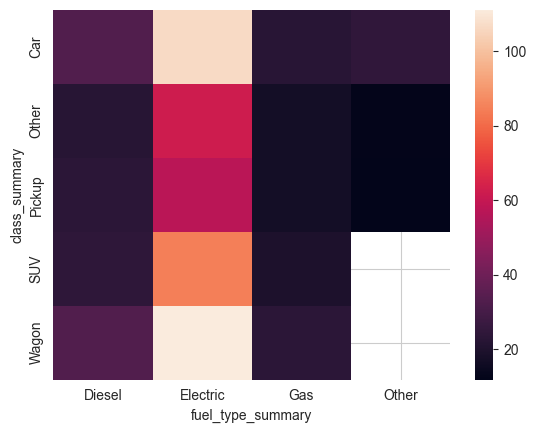

In [11]:
sns.heatmap(fuel_class)

<Axes: xlabel='fuel_type_summary', ylabel='class_summary'>

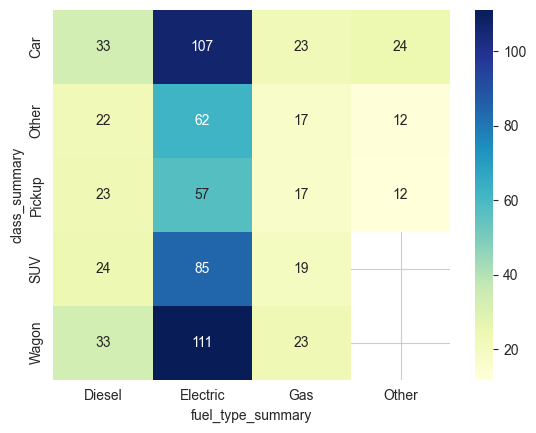

In [12]:
sns.heatmap(fuel_class,
           annot=True,
           fmt='.0f',
           cmap='YlGnBu')

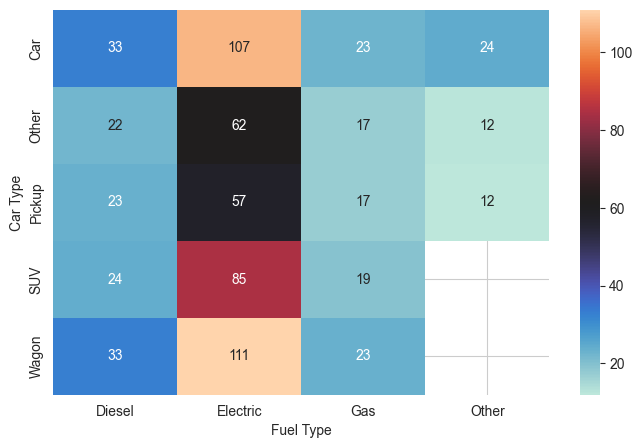

In [17]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(fuel_class, annot=True, fmt='.0f', cmap='icefire', ax=ax)
ax.set_ylabel('Car Type')
ax.set_xlabel('Fuel Type')
fig.savefig(Path.cwd()/'..'/'code'/'images'/'seaborn_heatmap.svg')

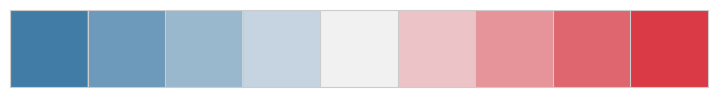

In [18]:
sns.palplot(sns.diverging_palette(240, 10, n=9))

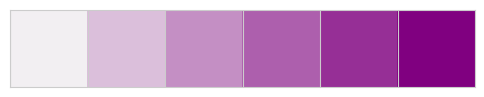

In [19]:
sns.palplot(sns.light_palette("purple"))

Text(0.5, 25.722222222222214, 'Fuel Type')

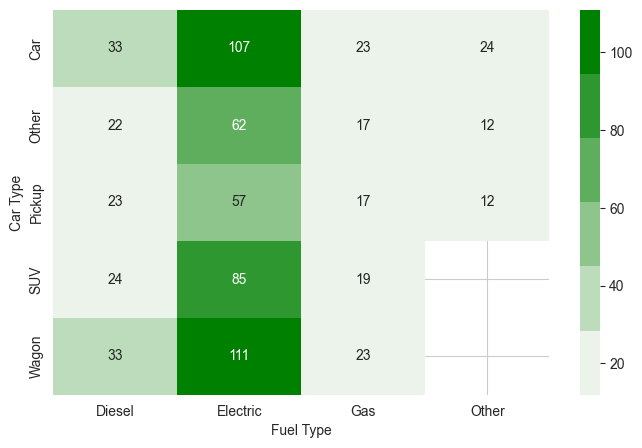

In [20]:
fig, ax = plt.subplots(figsize=(8,5))
custom_cmap_2 = sns.light_palette('green', as_cmap=False)
sns.heatmap(fuel_class, annot=True, fmt='.0f', cmap=custom_cmap_2, ax=ax)
ax.set_ylabel('Car Type')
ax.set_xlabel('Fuel Type')

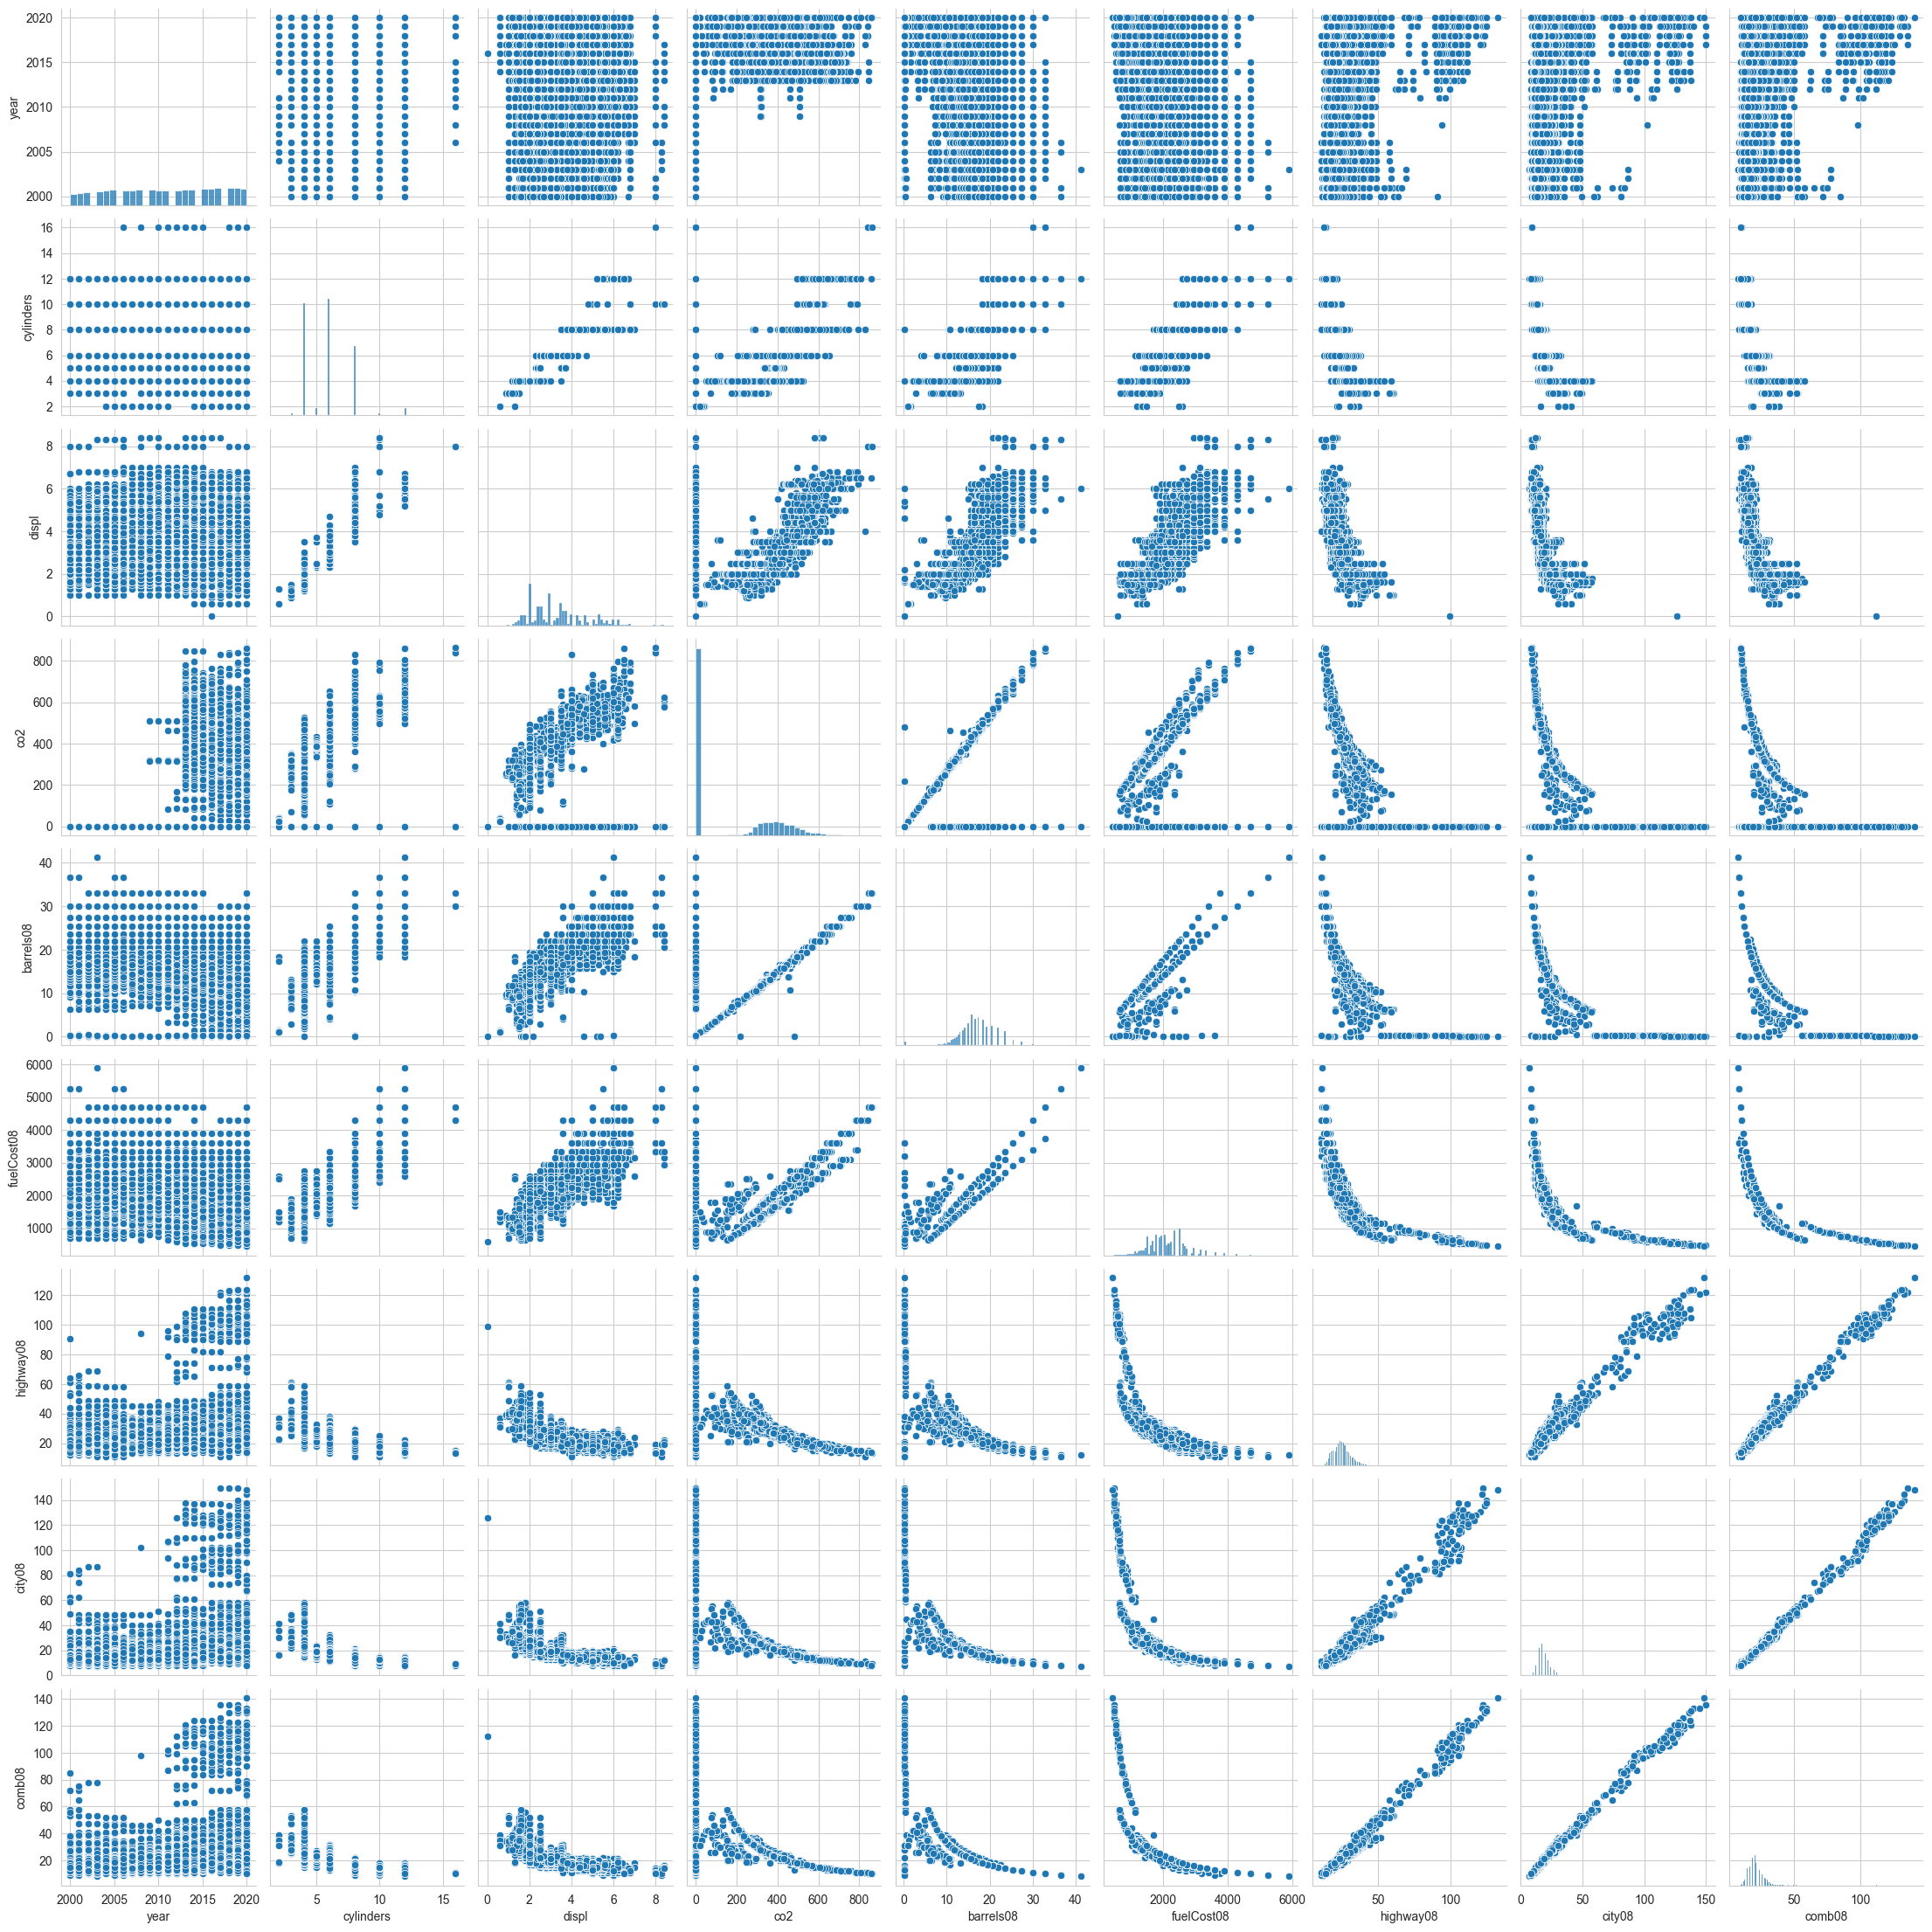

In [21]:
sns.pairplot(df)

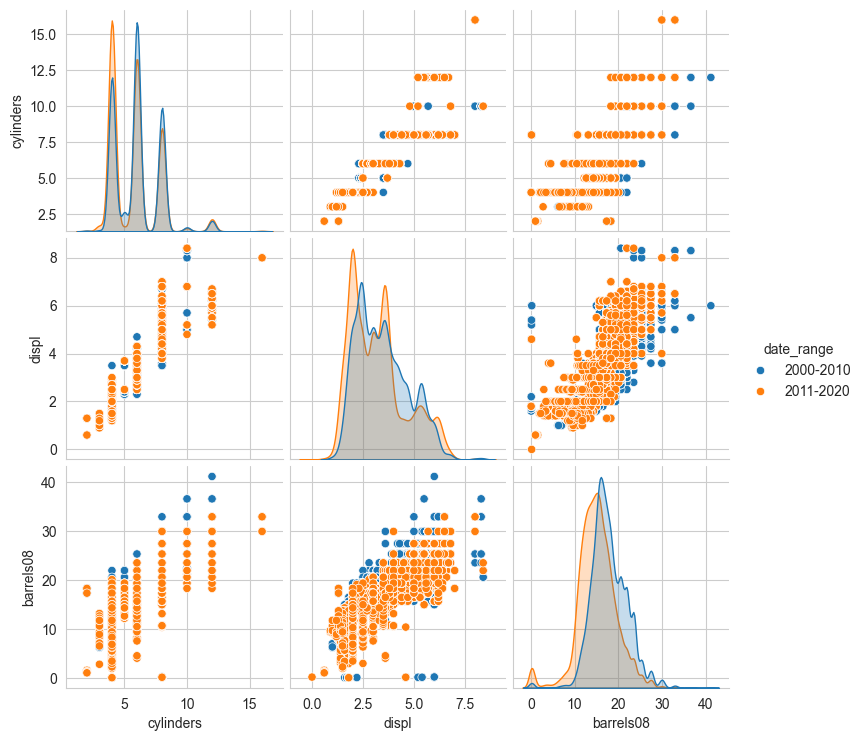

In [22]:
sns.pairplot(df,
             x_vars=['cylinders', 'displ', 'barrels08'],
             y_vars=['cylinders', 'displ', 'barrels08'],
             hue='date_range')

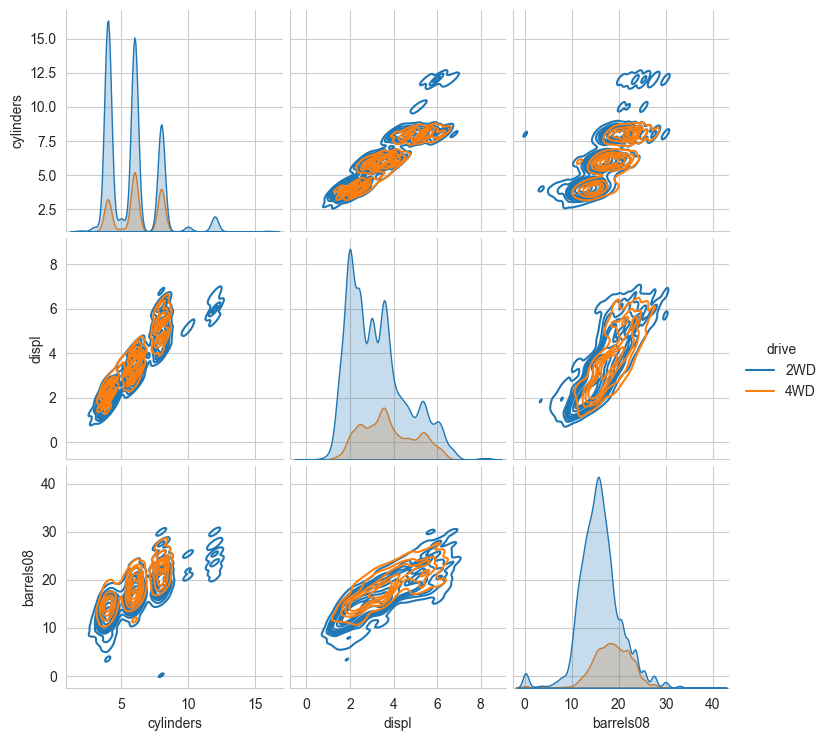

In [24]:
sns.pairplot(df, x_vars=['cylinders', 'displ', 'barrels08'],
         y_vars=['cylinders', 'displ', 'barrels08'],
         kind='kde',
         hue='drive')

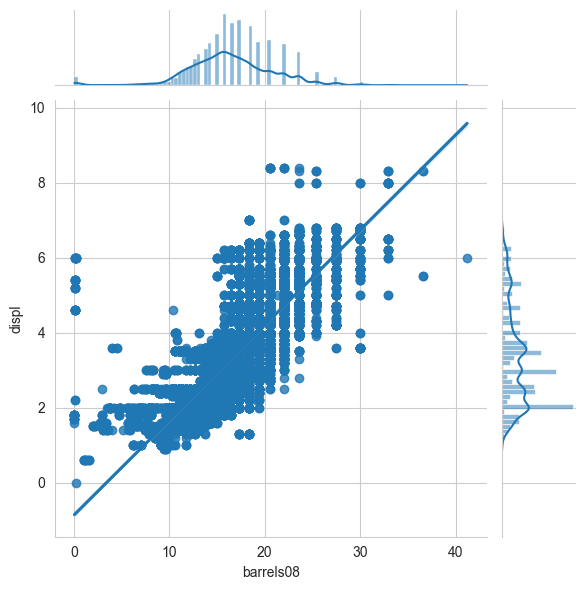

In [25]:
sns.jointplot(data=df, x="barrels08", y="displ", kind='reg')

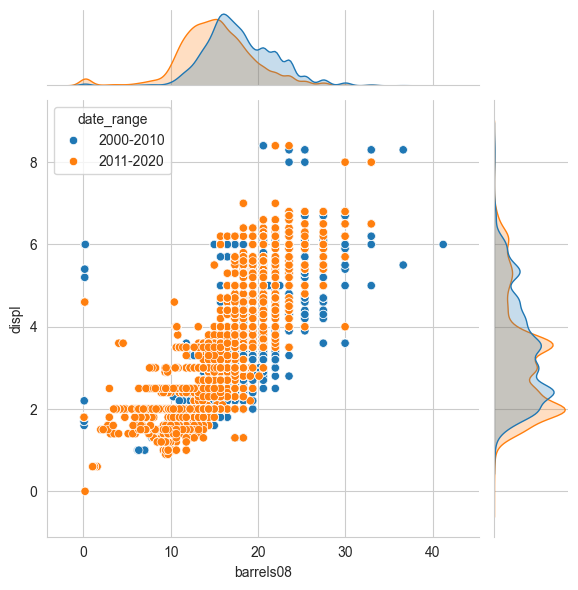

In [26]:
sns.jointplot(data=df, x="barrels08", y="displ", hue="date_range")

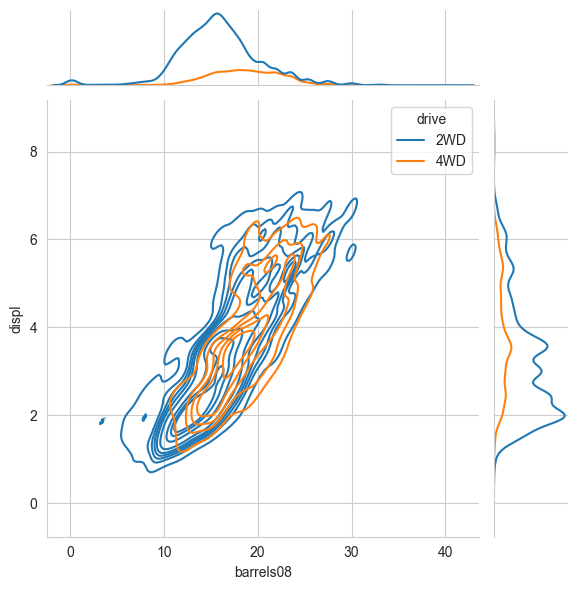

In [27]:
sns.jointplot(data=df, x="barrels08", y="displ", hue="drive", kind="kde")